### Importing Data And Analysis

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
col = data.columns
col

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

Number of Benign:  357
Number of Malignant :  212


<AxesSubplot: >

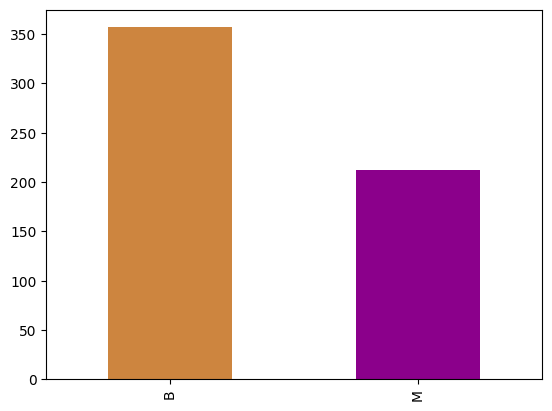

In [5]:
B, M = (data.diagnosis).value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

data["diagnosis"].value_counts().plot(kind="bar", color=["peru", "darkmagenta"])

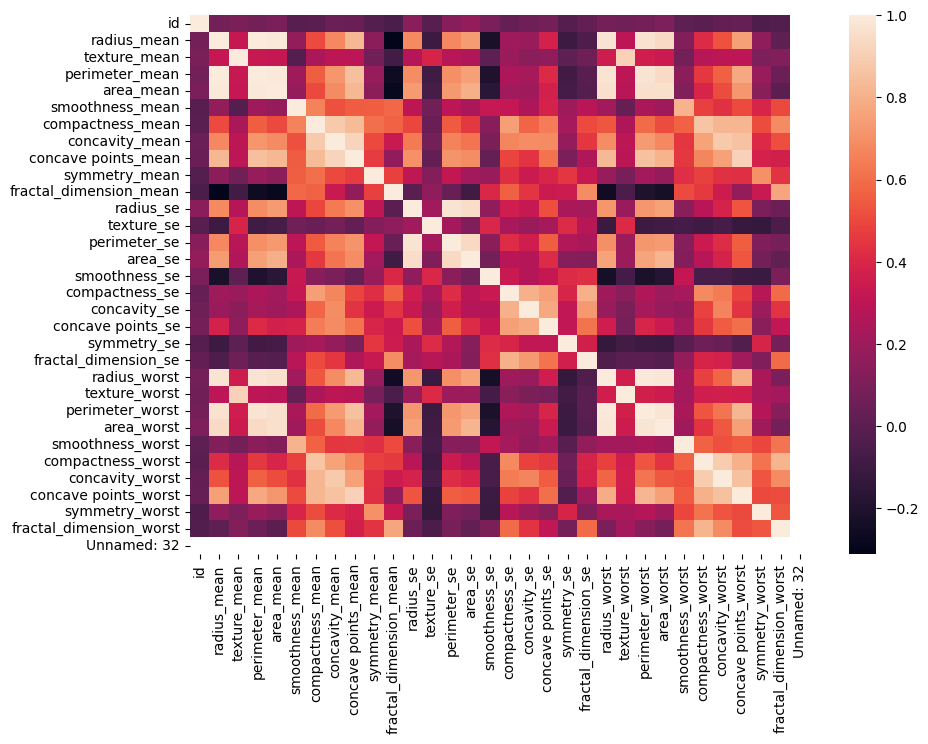

In [6]:
# Make the correlation matrix 
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(10, 7))
ax = sns.heatmap(corr_matrix)

In [7]:
y = data['diagnosis']
data = data.drop(['Unnamed: 32'],axis =1)
data = data.drop(['id'],axis =1)
data = data.drop(['diagnosis'], axis = 1)
x = data
x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [8]:
x.isnull().values.any()

False

In [9]:
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [10]:
input_cols = data.columns[:-1]
input_cols

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst'],
      dtype='object')

In [11]:
# process of normalization 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_scaled = scaler.fit(x)
x_scaled = pd.DataFrame(scaler.transform(x))
x_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


### ML Algorithm

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0 )
x_test.shape

(171, 30)

In [13]:
score_bef = []

In [14]:
def classification_report_TVK(matrix):
    tp = matrix[0,0]
    fp = matrix[0,1]
    fn = matrix[1,0]
    tn = matrix[1,1]
    print("Precision: ",tp/(tp+fp))
    print("Recall: ",tp/(tp+fn))
    print("F1 - score: ", (2 * (tp/(tp+fp)) * tp/(tp+fn))/(tp/(tp+fp) + tp/(tp+fn)))

In [15]:
def decisionTreeWithEntropy (train, test):
    model = DecisionTreeClassifier(criterion= 'entropy')
    model = model.fit(train, y_train)
    y_test_pred = model.predict(test)
    matrix = confusion_matrix(y_test, y_test_pred)
    test_score = accuracy_score(y_test, y_test_pred)
    print(" ")
    print("Decision Tree With Entropy")
    print(matrix)
    print("Accuracy: ", test_score)
    print(classification_report_TVK(matrix))
    

In [16]:
def logisticregression(train,test):
    model = LogisticRegression(random_state=0).fit(train, y_train)
    y_test_pred = model.predict(test) 
    matrix = confusion_matrix(y_test, y_test_pred)
    test_score = accuracy_score(y_test, y_test_pred)
    score_bef.append(test_score)
    print('Logistic Regression')
    print(matrix)
    print("Accuracy: ",test_score)
    print(classification_report_TVK(matrix))

In [17]:
def KNNalgorithm(train, test):
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(train, y_train)
    y_test_pred = model.predict(test)
    matrix = confusion_matrix(y_test, y_test_pred)
    test_score = accuracy_score(y_test, y_test_pred)
    score_bef.append(test_score)
    print('K - Nearest Neighbors')
    print(matrix)
    print("Accuracy: ",test_score)
    print(classification_report_TVK(matrix))

In [18]:
def decisiontreeWithGini(train,test):
    model = DecisionTreeClassifier(criterion = 'gini')
    model = model.fit(train,y_train)
    y_test_pred = model.predict(test)
    matrix = confusion_matrix(y_test, y_test_pred)
    test_score = accuracy_score(y_test, y_test_pred)
    score_bef.append(test_score)
    print(' ')
    print('Decision Tree With Gini')
    print(matrix)
    print("Accuracy: ",test_score)
    print(classification_report_TVK(matrix))

In [19]:
logisticregression(x_train,x_test)

Logistic Regression
[[103   5]
 [  2  61]]
Accuracy:  0.9590643274853801
Precision:  0.9537037037037037
Recall:  0.9809523809523809
F1 - score:  0.9671361502347416
None


In [20]:
KNNalgorithm(x_train,x_test)

K - Nearest Neighbors
[[103   5]
 [  4  59]]
Accuracy:  0.9473684210526315
Precision:  0.9537037037037037
Recall:  0.9626168224299065
F1 - score:  0.958139534883721
None


In [21]:
decisionTreeWithEntropy(x_train,x_test)

 
Decision Tree With Entropy
[[100   8]
 [  3  60]]
Accuracy:  0.935672514619883
Precision:  0.9259259259259259
Recall:  0.970873786407767
F1 - score:  0.9478672985781991
None


In [22]:
decisiontreeWithGini(x_train,x_test)

 
Decision Tree With Gini
[[100   8]
 [  4  59]]
Accuracy:  0.9298245614035088
Precision:  0.9259259259259259
Recall:  0.9615384615384616
F1 - score:  0.9433962264150944
None


### PCA

In [23]:
# Finding the eigenvector and Eigenvalue

column_values = []
for i in range(len(x_scaled.columns)):
    column_values.append(x_scaled.iloc[:,i].values)
    
#Making Covariance Matrix
covariance_matrix = np.cov(column_values)

#Getting the EigenVectors and the EigenValues
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)



In [24]:
#First Element of the Covariance Matrix
covariance_matrix[0]

array([ 0.027818  ,  0.00785484,  0.02794603,  0.02458229,  0.00361231,
        0.01367458,  0.02108345,  0.02645754,  0.00341174, -0.00772894,
        0.01137405, -0.00197887,  0.01071215,  0.01042819, -0.00378944,
        0.00462112,  0.00246906,  0.0073333 , -0.00202383, -0.00065016,
        0.02780391,  0.00811481,  0.02693902,  0.02196388,  0.0030081 ,
        0.0105267 ,  0.01464405,  0.028038  ,  0.00333488,  0.00013961])

In [25]:
#First Eigenvector
eigen_vectors[0]

array([-2.42675774e-01, -2.61316697e-01, -5.95222384e-02,  3.94334569e-02,
       -5.88423544e-04,  2.07022394e-02,  2.42488690e-03, -4.38845905e-02,
        9.75085975e-02,  2.22769562e-01, -8.31524671e-02, -1.19734434e-01,
       -3.89565406e-02, -1.07972318e-01,  1.93030259e-01, -7.30164853e-02,
        2.97307938e-01, -1.47147813e-02,  3.38169231e-02, -4.54114194e-02,
        6.29772186e-02, -1.38267325e-01, -7.05072198e-01, -1.96766318e-01,
       -1.47132741e-01, -1.30574879e-01,  1.54107718e-01, -9.73681525e-02,
        5.86339157e-02, -5.57071438e-02])

In [26]:
print('The first eigen value is',round(eigen_values[0],4))

The first eigen value is 0.3313


In [27]:
#Expalained Varience
explained_variance = []
c= 0
for i in range(len((eigen_values/(np.sum(eigen_values))*100))): 
    c = c + np.around((eigen_values[i]/(np.sum(eigen_values))*100),3)
    while c < 92:
        explained_variance.append(c)
        print('At', i,'PC,', 'Explained Variance is',c)
        break

At 0 PC, Explained Variance is 53.098
At 1 PC, Explained Variance is 70.381
At 2 PC, Explained Variance is 77.495
At 3 PC, Explained Variance is 83.906
At 4 PC, Explained Variance is 87.992
At 5 PC, Explained Variance is 91.063


In [28]:
print('We have been able to achieve the', np.around(explained_variance[-1],4), 
      'variance with just first', len(explained_variance), 
      'elements so we will have', len(explained_variance), 'PCs.')

We have been able to achieve the 91.063 variance with just first 6 elements so we will have 6 PCs.


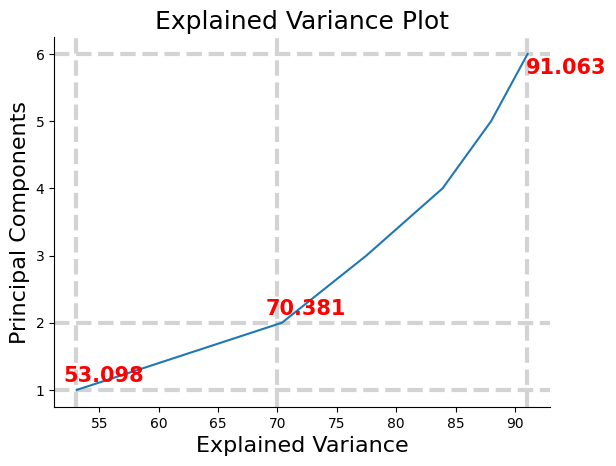

In [29]:
sns.lineplot(x=explained_variance,  y=range(1,len(explained_variance)+1))

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.axhline(1, linestyle='--', lw=3, zorder=1, color='lightgray')
plt.axhline(2, linestyle='--', lw=3, zorder=1, color='lightgray')
plt.axhline(6, linestyle='--', lw=3, zorder=1, color='lightgray')
plt.axvline(53, linestyle='--', lw=3, zorder=1, color='lightgray')
plt.axvline(70, linestyle='--', lw=3, zorder=1, color='lightgray')
plt.axvline(91, linestyle='--', lw=3, zorder=1, color='lightgray')

plt.annotate(f'70.381', (69, 2.12), fontsize=15, fontweight='bold', color='red')
plt.annotate(f'53.098', (52, 1.12), fontsize=15,  fontweight='bold', color='red')
plt.annotate(f'91.063', (90.9, 5.7), fontsize=15, fontweight='bold', color='red')

plt.title('Explained Variance Plot', fontsize=18)
plt.xlabel('Explained Variance', fontsize=16)
plt.ylabel('Principal Components',fontsize=16)
plt.show()

### So we will chose using PCS with 6 components

In [30]:
# PCA needs scaled data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [31]:
# Build PCA
pca = PCA(n_components = 6)
pca.fit(x_scaled)
X_reduced_pca = pca.transform(x_scaled)
X_reduced_pca.shape

(569, 6)

In [32]:
pca_data = pd.DataFrame(X_reduced_pca,columns=["p1","p2","p3","p4","p5","p6"])
pca_data["diagnosis"] = y
pca_data.head()

,p1,p2,p3,p4,p5,p6,diagnosis
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,M
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,M
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,M
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,M
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,M


Text(0, 0.5, 'PC2')

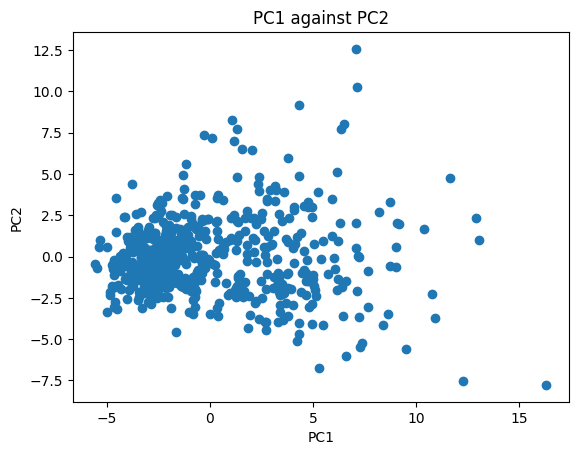

In [33]:
plt.scatter(pca_data['p1'], pca_data['p2'])
plt.title('PC1 against PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')

Text(158.22222222222223, 0.5, 'Features')

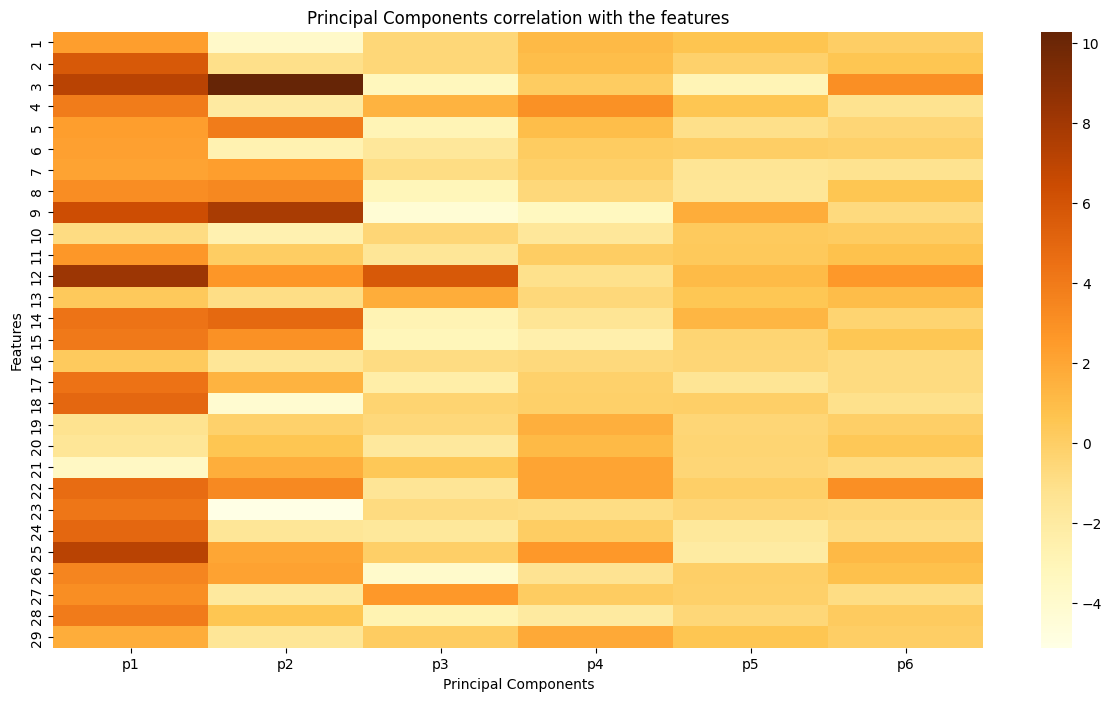

In [34]:
plt.figure(figsize=(15, 8))
sns.heatmap(pca_data.iloc[1:30,:-1],cmap="YlOrBr")
plt.title('Principal Components correlation with the features')
plt.xlabel('Principal Components')
plt.ylabel('Features')

In [35]:
### Prepare X and Y
y_pca = pca_data.diagnosis
x_pca = pca_data.drop(["diagnosis"],axis=1)

In [36]:
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_pca, y_pca, test_size=0.3, random_state=42)

In [37]:
print('x_train_pca Shape -',x_pca.shape,',', 'y_train_pca Shape -', y_train_pca.shape)
print('x_test_pcae -', x_test_pca.shape,',','y_test_pca shape -', y_test_pca.shape)

x_train_pca Shape - (569, 6) , y_train_pca Shape - (398,)
x_test_pcae - (171, 6) , y_test_pca shape - (171,)


### Grid Search For Algorithms

In [38]:
# Grid Search for LR
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg1=LogisticRegression()
logreg1_cv=GridSearchCV(logreg1,grid,cv=10)
logreg1_cv.fit(x_train_pca,y_train_pca)

print("tuned hpyerparameters :(best parameters) ",logreg1_cv.best_params_)
print("accuracy :",logreg1_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'l2'}
accuracy : 0.9673076923076923


In [39]:
# Grid Search for KNN
k_range = [5,7,9,11,13,15,17,19,21]
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors=k_range, weights=weight_options)
logreg2=KNeighborsClassifier()
logreg2_cv = GridSearchCV(logreg2, param_grid, cv=10, scoring='accuracy', return_train_score=False)
logreg2_cv.fit(x_train_pca,y_train_pca)


print("tuned hpyerparameters :(best parameters) ",logreg2_cv.best_params_)
print("accuracy :",logreg2_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'n_neighbors': 17, 'weights': 'distance'}
accuracy : 0.9521794871794873


In [40]:
#Grid search for Decistion tree
logreg3 = DecisionTreeClassifier()
param_grid = {
    "criterion" : ['gini', 'entropy'],
    "max_depth":range(1,10),
    "min_samples_split": range(1,10),
    "min_samples_leaf": range(1,5)
}
logreg3_cv = GridSearchCV(logreg3, param_grid, cv =10)
logreg3_cv.fit(x_train_pca,y_train_pca)

print("tuned hpyerparameters :(best parameters) ",logreg3_cv.best_params_)
print("accuracy :",logreg3_cv.best_score_)



tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
accuracy : 0.9348076923076922


In [41]:
names = ['Logistic Regression', "KNN", "Decision Tree"]
classifiers = [
    LogisticRegression(C=1,penalty="l2"),
    KNeighborsClassifier(n_neighbors=17, weights= 'distance'),
    DecisionTreeClassifier(criterion = "entropy" ,max_depth=5, min_samples_leaf=1, min_samples_split = 2),
]

In [42]:
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(x_train_pca, y_train_pca)
    score = clf.score(x_test_pca, y_test_pca)
    scores.append(score)
scores_df = pd.DataFrame(index = names)
#scores_df['name'] = names
scores_df['Score_after'] = np.around(scores,3)
scores_df['Score_before'] = np.around(score_bef,3)
scores_df

,Score_after,Score_before
Logistic Regression,0.988,0.959
KNN,0.959,0.947
Decision Tree,0.947,0.930


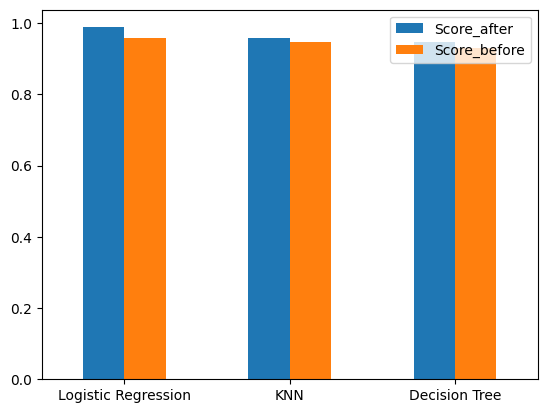

In [43]:
ax = scores_df.plot.bar(rot=0)